<a href="https://colab.research.google.com/github/carloidangelo/ECSE-415/blob/main/A4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Assignment 3

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt

import cv2
import numpy as np
import math

%matplotlib inline

path = '/content/drive/My Drive/ECSE415/Assignments/A4/'

##Image Segmentation using K-means


In [ ]:
# function for finding SSD between pixels (rgb)
def distance_clr(p1, p2):
  diff_r = p2[0] - p1[0]
  diff_g = p2[1] - p1[1]
  diff_b = p2[2] - p1[2]
  distance = ((diff_r * diff_r) + (diff_g * diff_g) + (diff_b * diff_b))
  return distance

In [ ]:
# class for implementing K-means algorithm
class K_means:
  def __init__(self, k, nbr_iterations):
    self.k = k
    self.nbr_iterations = nbr_iterations

  def find_labels(self, img_rgb_2D):
    length, width = img_rgb_2D.shape
    # randomly initialize the cluster centers (# of cluster centers = self.k)
    # the final segmented images can vary depending on the initial cluster centers
    centers = np.random.randint(0, 255, (self.k, 3))
    labels = [] 
    for i in range(self.nbr_iterations):
      for j in range(length):
        distances = []
        for k in range(self.k):
          dist = distance_clr(centers[k], img_rgb_2D[j])
          distances.append(dist)
        min_dist = min(distances)
        index = distances.index(min_dist)
        # assign a label to each pixel in image (# of labels = self.k)
        labels.append(index)
      # find new cluster centers
      for x in range(self.k): 
        center_new = np.array([0,0,0])
        count = 0
        for y in range(length):
          if labels[y] == x:
            center_new = center_new + np.array(img_rgb_2D[y])
            count = count + 1
        if count != 0:
          center_new = center_new/count
          centers[x] = center_new
    return (labels, centers)

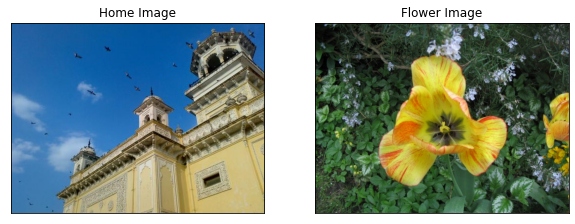

In [ ]:
# read images
img_home_bgr = cv2.imread(path+"home.jpg")
img_home_rgb = cv2.cvtColor(img_home_bgr, cv2.COLOR_BGR2RGB)

img_flower_bgr = cv2.imread(path+"flower.jpg")
img_flower_rgb = cv2.cvtColor(img_flower_bgr, cv2.COLOR_BGR2RGB)

# display images
plt.figure(figsize=(10,8))
plt.subplot(121), plt.imshow(img_home_rgb)
plt.title("Home Image"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(img_flower_rgb)
plt.title("Flower Image"), plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
# convert 3D images to 2D with RGB values intact
img_home_rgb_2D = np.reshape(img_home_rgb, (-1, 3))
length_home, width_home = img_home_rgb_2D.shape

img_flower_rgb_2D = np.reshape(img_flower_rgb, (-1, 3))
length_flower, width_flower = img_flower_rgb_2D.shape

In [ ]:
# K = 2 Home
home_k2 = K_means(2, 10)
labels_home_k2, centers_home_k2 = home_k2.find_labels(img_home_rgb_2D)

In [ ]:
# K = 3 Home
home_k3 = K_means(3, 10)
labels_home_k3, centers_home_k3 = home_k3.find_labels(img_home_rgb_2D)

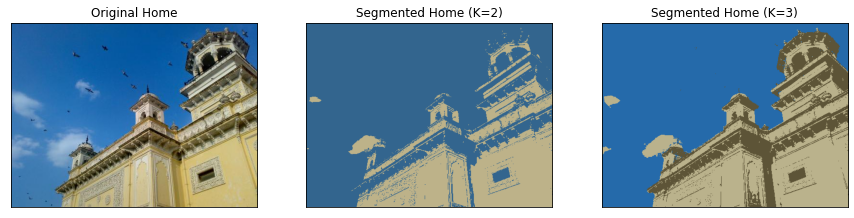

In [ ]:
# K = 2 Home
seg_home_k2 = []
for i in range(length_home):
  if labels_home_k2[i] == 0:
    seg_home_k2.append(centers_home_k2[0].astype(int))
  elif labels_home_k2[i] == 1:
    seg_home_k2.append(centers_home_k2[1].astype(int))
seg_home_k2_2D = np.reshape(seg_home_k2, (384,512,3))

# K = 3 Home
seg_home_k3 = []
for i in range(length_home):
  if labels_home_k3[i] == 0:
    seg_home_k3.append(centers_home_k3[0].astype(int))
  elif labels_home_k3[i] == 1:
    seg_home_k3.append(centers_home_k3[1].astype(int))
  elif labels_home_k3[i] == 2:
    seg_home_k3.append(centers_home_k3[2].astype(int))
seg_home_k3_2D = np.reshape(seg_home_k3, (384,512,3))

# display images
plt.figure(figsize=(15,8))
plt.subplot(131), plt.imshow(img_home_rgb)
plt.title("Original Home"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(seg_home_k2_2D)
plt.title("Segmented Home (K=2)"), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(seg_home_k3_2D)
plt.title("Segmented Home (K=3)"), plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
# K = 2 Flower
flower_k2 = K_means(2, 10)
labels_flower_k2, centers_flower_k2 = flower_k2.find_labels(img_flower_rgb_2D)

In [ ]:
# K = 3 Flower
flower_k3 = K_means(3, 10)
labels_flower_k3, centers_flower_k3 = flower_k3.find_labels(img_flower_rgb_2D)

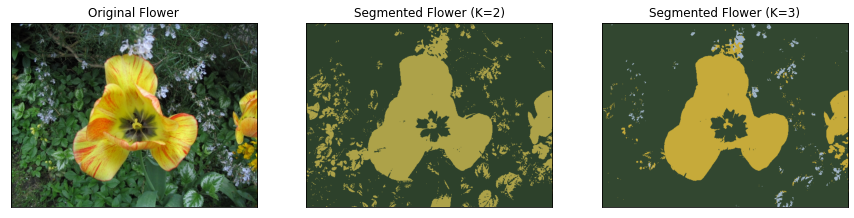

In [ ]:
# K = 2 Flower
seg_flower_k2 = []
for i in range(length_flower):
  if labels_flower_k2[i] == 0:
    seg_flower_k2.append(centers_flower_k2[0].astype(int))
  elif labels_flower_k2[i] == 1:
    seg_flower_k2.append(centers_flower_k2[1].astype(int))
seg_flower_k2_2D = np.reshape(seg_flower_k2, (450,600,3))

# K = 3 Flower
seg_flower_k3 = []
for i in range(length_flower):
  if labels_flower_k3[i] == 0:
    seg_flower_k3.append(centers_flower_k3[0].astype(int))
  elif labels_flower_k3[i] == 1:
    seg_flower_k3.append(centers_flower_k3[1].astype(int))
  elif labels_flower_k3[i] == 2:
    seg_flower_k3.append(centers_flower_k3[2].astype(int))
seg_flower_k3_2D = np.reshape(seg_flower_k3, (450,600,3))

# display images
plt.figure(figsize=(15,8))
plt.subplot(131), plt.imshow(img_flower_rgb)
plt.title("Original Flower"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(seg_flower_k2_2D)
plt.title("Segmented Flower (K=2)"), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(seg_flower_k3_2D)
plt.title("Segmented Flower (K=3)"), plt.xticks([]), plt.yticks([])
plt.show()

##Disparity

In [ ]:
# function for finding SSD between 5x5 windows
def distance_window(window1, window2):
  sum = 0
  for i in range(25):
    diff = window2[i] - window1[i]
    sum += diff*diff
  return sum

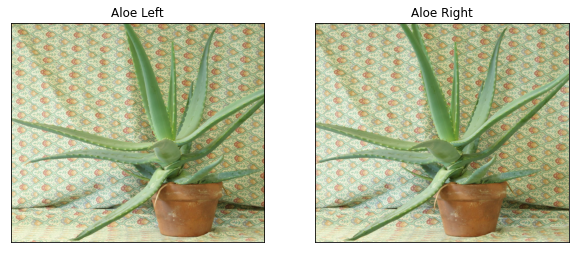

In [ ]:
# read images
aloe_left_bgr = cv2.imread(path+"aloeL.jpg")
aloe_left_rgb = cv2.cvtColor(aloe_left_bgr, cv2.COLOR_BGR2RGB)
aloe_left_gray = cv2.cvtColor(aloe_left_bgr, cv2.COLOR_BGR2GRAY)

aloe_right_bgr = cv2.imread(path+"aloeR.jpg")
aloe_right_rgb = cv2.cvtColor(aloe_right_bgr, cv2.COLOR_BGR2RGB)
aloe_right_gray = cv2.cvtColor(aloe_right_bgr, cv2.COLOR_BGR2GRAY)

# display images
plt.figure(figsize=(10,8))
plt.subplot(121), plt.imshow(aloe_left_rgb)
plt.title("Aloe Left"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(aloe_right_rgb)
plt.title("Aloe Right"), plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
# resize images for fast processing
aloe_left_gray_smaller = cv2.resize(aloe_left_gray, None, fx=0.3, fy=0.3)
aloe_left_gray_smaller_int32 = aloe_left_gray_smaller.astype('int32') 
aloe_right_gray_smaller = cv2.resize(aloe_right_gray, None, fx=0.3, fy=0.3)
aloe_right_gray_smaller_int32 = aloe_right_gray_smaller.astype('int32') 

length_aloe_left, width_aloe_left = aloe_left_gray_smaller_int32.shape
length_aloe_right, width_aloe_right = aloe_right_gray_smaller_int32.shape
window_size = (5,5)

# extract 5×5 reference windows
patches_left = []
for i in range(0, length_aloe_left - (window_size[0]-1)):
  for j in range(0, width_aloe_left - (window_size[1]-1)):
    patch = []
    for x in range(window_size[0]):
      for y in range(window_size[1]):
        patch.append(aloe_left_gray_smaller_int32[i+x][j+y])
    patches_left.append(patch)

patches_left = np.reshape(patches_left, (length_aloe_left - (window_size[0]-1), width_aloe_left - (window_size[1]-1), 25))

In [ ]:
# create placehoder for disparity map
disparity = np.zeros((length_aloe_right,width_aloe_right))

for p in range(0, length_aloe_right):
  for q in range(0, width_aloe_right):
    # when search region lies outside the boundary of the image
    if q<47:
      disparity[p][q] = 48
    # when reference window lies outside the boundary of the image
    elif q>=width_aloe_right - (window_size[0]-1) or p>=length_aloe_right - (window_size[0]-1):
      disparity[p][q] = 48
    else:
      patches = []
      # on the right scanline, create a search region
      # extract 5×5 windows centered at every pixel location in this search region
      for r in range(48):
        patch = []
        for x in range(window_size[0]):
          for y in range(window_size[1]):
            patch.append(aloe_right_gray_smaller_int32[p+x][q+y-r])
        patches.append(patch)
      ssd_values = []
      for s in range(48):
        # compute sum-of-square-difference(SSD)
        ssd = distance_window(patches_left[p][q],patches[s])
        ssd_values.append(ssd)
      # find location with minimum SSD
      min_ssd = min(ssd_values)
      index = ssd_values.index(min_ssd)
      j_R = q - index
      j_L = q
      # compute disparity
      disp = j_L - j_R
      disparity[p][q] = disp  

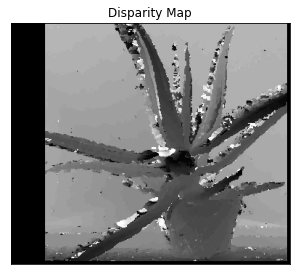

In [ ]:
# display disparity map
plt.figure(figsize=(5,5))
plt.subplot(111), plt.imshow(disparity,cmap='gray_r')
plt.title("Disparity Map"), plt.xticks([]), plt.yticks([])
plt.show()


##Optical Flow


In [ ]:
# function that calculates mean squared error(MSE) between 2-channel images
def getMSE(image1, image2):
  rows, columns, __ = image1.shape
  mse_xy = []
  # calculates MSE between the two channels separately
  for i in range(2):
    sum = 0
    for j in range(rows):
      for k in range(columns):
        diff = image1[j][k][i] - image2[j][k][i]
        sum += diff*diff
    mse = sum/(rows * columns)
    mse_xy.append(mse)
  mse_avg = (mse_xy[0] + mse_xy[1]) / 2
  return (mse_xy[0], mse_xy[1], mse_avg)

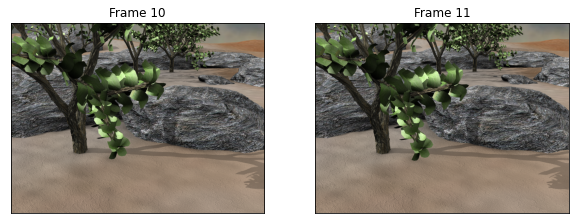

In [ ]:
# read ground-truth flow
gt = np.load(path + 'flow10.npz')['flow']

# read input frames
frame_10_bgr = cv2.imread(path+"frame10.png")
frame_10_rgb = cv2.cvtColor(frame_10_bgr, cv2.COLOR_BGR2RGB)
frame_10_gray = cv2.cvtColor(frame_10_bgr, cv2.COLOR_BGR2GRAY)

frame_11_bgr = cv2.imread(path+"frame11.png")
frame_11_rgb = cv2.cvtColor(frame_11_bgr, cv2.COLOR_BGR2RGB)
frame_11_gray = cv2.cvtColor(frame_11_bgr, cv2.COLOR_BGR2GRAY)

# display input frames
plt.figure(figsize=(10,8))
plt.subplot(121), plt.imshow(frame_10_rgb)
plt.title("Frame 10"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(frame_11_rgb)
plt.title("Frame 11"), plt.xticks([]), plt.yticks([])
plt.show()

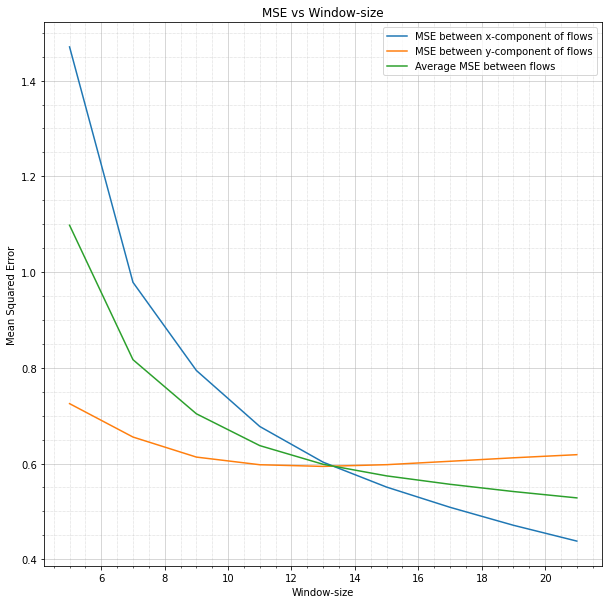

In [ ]:
mse_list_x = []
mse_list_y = []
mse_list_avg = []
# for each setting of winsize, measure mean squared error(MSE)
for i in range(5,22,2): 
  # compute optical flow using the Gunner Farneback's algorithm
  flow = cv2.calcOpticalFlowFarneback(prev=frame_10_gray, 
                                      next=frame_11_gray, 
                                      flow=None,
                                      pyr_scale=0.5, 
                                      levels=3, 
                                      winsize=i, # Vary winsize from 5 to 21
                                      iterations=3, 
                                      poly_n=5, 
                                      poly_sigma=1.2, 
                                      flags=0)
  
  # measure MSE between estimated optical flow and the ground truth optical flow
  mse_x, mse_y, mse_avg = getMSE(flow, gt)
  mse_list_x.append(mse_x)
  mse_list_y.append(mse_y)
  mse_list_avg.append(mse_avg)

# plot MSE (y-axis) vs winsize (x-axis)
plt.figure(figsize=(10,10))
plt.plot(np.arange(5,22,2), mse_list_x, label = "MSE between x-component of flows")
plt.plot(np.arange(5,22,2), mse_list_y, label = "MSE between y-component of flows")
plt.plot(np.arange(5,22,2), mse_list_avg, label = "Average MSE between flows")
plt.xlabel('Window-size')
plt.ylabel('Mean Squared Error')
plt.title('MSE vs Window-size')
plt.legend()
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5')
plt.grid(which='minor', linestyle=':', linewidth='0.5') 
plt.show()

Overall, the error decreases with increasing window-size. This trend makes sense because increasing the window size will improve the motion detection and, therefore, result in better estimated optical flow.